#Data Pre-Processing

In [ ]:
import pandas as pd

# Read CO2 Emissions data
co2Data = pd.read_csv('/content/CO2Data.csv')


# Read Greenhouse Gases data
ggData = pd.read_csv('/content/GreenhouseGasses.csv')

# Read Surface Temperature Change data
tempData = pd.read_csv('/content/TempData.csv')

# Now you can perform data preprocessing or further analysis on the loaded datasets

In [ ]:
ggData.head()

,Year,CO2,CH4,N2O,CFC*,HCFCs,HFCs*,Total,Total.1,1990 = 1,change **
0,1979,1.027,0.406,0.104,0.154,0.008,0.001,1.700,382,0.785,NaN
1,1980,1.060,0.413,0.104,0.163,0.009,0.001,1.749,386,0.808,2.3
2,1981,1.079,0.420,0.107,0.172,0.009,0.001,1.788,388,0.825,1.8
3,1982,1.091,0.426,0.111,0.180,0.010,0.001,1.819,391,0.840,1.5
4,1983,1.117,0.429,0.113,0.190,0.011,0.001,1.861,394,0.859,1.9


In [ ]:
tempData.head()

,Year,Value
0,1850,-0.22
1,1851,-0.19
2,1852,-0.38
3,1853,-0.18
4,1854,-0.22


In [ ]:
tempData.tail()

,Year,Value
169,2019,1.05
170,2020,1.11
171,2021,0.79
172,2022,0.90
173,2023,1.00


In [ ]:
co2Data.head()

,year,mean,unc
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12


In [ ]:
ggData.describe()

,Year,CO2,CH4,N2O,CFC*,HCFCs,HFCs*,Total,Total.1,1990 = 1,change **
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,44.000000
mean,2000.911111,1.570311,0.475667,0.154622,0.251378,0.034044,0.014711,2.500689,445.244444,1.154733,1.677273
std,12.990945,0.343749,0.030469,0.032262,0.034604,0.017099,0.014129,0.452937,37.559744,0.209166,0.377177
min,1979.000000,1.027000,0.406000,0.104000,0.154000,0.008000,0.001000,1.700000,382.000000,0.785000,0.700000
25%,1990.000000,1.294000,0.459000,0.129000,0.246000,0.018000,0.003000,2.166000,417.000000,1.000000,1.500000
50%,2001.000000,1.538000,0.481000,0.153000,0.263000,0.034000,0.009000,2.494000,443.000000,1.152000,1.700000
75%,2012.000000,1.848000,0.494000,0.181000,0.276000,0.051000,0.025000,2.860000,475.000000,1.321000,1.825000
max,2021.000000,2.140000,0.526000,0.210000,0.282000,0.058000,0.044000,3.222000,508.000000,1.488000,2.700000


In [ ]:
tempData.describe()

,Year,Value
count,174.000000,174.000000
mean,1936.500000,0.050115
std,50.373604,0.374245
min,1850.000000,-0.590000
25%,1893.250000,-0.210000
50%,1936.500000,-0.070000
75%,1979.750000,0.237500
max,2023.000000,1.140000


In [ ]:
co2Data.describe()

,year,mean,unc
count,64.000000,64.000000,64.00
mean,1990.500000,358.295156,0.12
std,18.618987,30.583707,0.00
min,1959.000000,315.980000,0.12
25%,1974.750000,330.895000,0.12
50%,1990.500000,355.075000,0.12
75%,2006.250000,382.572500,0.12
max,2022.000000,418.560000,0.12


In [ ]:
# Check for missing values in each dataset
co2_missing_values = co2Data.isnull().sum()
gg_missing_values = ggData.isnull().sum()
temp_missing_values = tempData.isnull().sum()

# Print the number of missing values in each dataset
print("CO2 Emissions - Missing Values:")
print(co2_missing_values)

print("\nGreenhouse Gases - Missing Values:")
print(gg_missing_values)

print("\nSurface Temperature Change - Missing Values:")
print(temp_missing_values)

CO2 Emissions - Missing Values:
year    0
mean    0
unc     0
dtype: int64

Greenhouse Gases - Missing Values:
Year         0
CO2          0
CH4          0
N2O          0
CFC*         0
HCFCs        0
HFCs*        0
Total        0
Total.1      0
1990 = 1     0
change **    1
dtype: int64

Surface Temperature Change - Missing Values:
Year     0
Value    0
dtype: int64


In [ ]:
co2Data = co2Data.fillna(co2Data.mean())
ggData = ggData.fillna(ggData.mean())
tempData = tempData.fillna(tempData.mean())

In [ ]:
# rename 'year' column in co2Data
co2Data.rename(columns={'year': 'Year'}, inplace=True)

# filter dataframes to include data from 1974 to 2021 only
ggData = ggData[(ggData['Year'] >= 1979) & (ggData['Year'] <= 2021)]
tempData = tempData[(tempData['Year'] >= 1979) & (tempData['Year'] <= 2021)]
co2Data = co2Data[(co2Data['Year'] >= 1979) & (co2Data['Year'] <= 2021)]

# merge the dataframes
df = pd.merge(ggData, tempData, on='Year')
df = pd.merge(df, co2Data, on='Year')

In [ ]:
# Define a dictionary with old column names as keys and new column names as values
rename_dict = {
    'Year': 'Year',
    'CO2': 'CO2',
    'CH4': 'Methane',
    'N2O': 'Nitrous_Oxide',
    'CFC*': 'CFCs',
    'HCFCs': 'Hydrochlorofluorocarbons',
    'HFCs*': 'Hydrofluorocarbons',
    'Total': 'Total_Greenhouse_Gases',
    'Total.1': 'Total_Greenhouse_Gases_Scaled',
    '1990 = 1': '1990_Equals_1',
    'change **': 'Change',
    'Value': 'Surface_Temperature',
    'mean': 'CO2_Mean',
    'unc': 'CO2_Uncertainty'
}

# Rename the columns
df.rename(columns=rename_dict, inplace=True)
df = df.drop(columns=['CO2_Uncertainty'])

In [ ]:
df.describe()

,Year,CO2,Methane,Nitrous_Oxide,CFCs,Hydrochlorofluorocarbons,Hydrofluorocarbons,Total_Greenhouse_Gases,Total_Greenhouse_Gases_Scaled,1990_Equals_1,Change,Surface_Temperature,CO2_Mean
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,2000.911111,1.570311,0.475667,0.154622,0.251378,0.034044,0.014711,2.500689,445.244444,1.154733,1.677273,0.576444,374.498444
std,12.990945,0.343749,0.030469,0.032262,0.034604,0.017099,0.014129,0.452937,37.559744,0.209166,0.372866,0.276703,24.544047
min,1979.000000,1.027000,0.406000,0.104000,0.154000,0.008000,0.001000,1.700000,382.000000,0.785000,0.700000,0.100000,336.840000
25%,1990.000000,1.294000,0.459000,0.129000,0.246000,0.018000,0.003000,2.166000,417.000000,1.000000,1.500000,0.370000,354.450000
50%,2001.000000,1.538000,0.481000,0.153000,0.263000,0.034000,0.009000,2.494000,443.000000,1.152000,1.700000,0.570000,371.320000
75%,2012.000000,1.848000,0.494000,0.181000,0.276000,0.051000,0.025000,2.860000,475.000000,1.321000,1.800000,0.790000,394.060000
max,2021.000000,2.140000,0.526000,0.210000,0.282000,0.058000,0.044000,3.222000,508.000000,1.488000,2.700000,1.140000,416.450000


In [ ]:
df.isnull().sum()

Year                             0
CO2                              0
Methane                          0
Nitrous_Oxide                    0
CFCs                             0
Hydrochlorofluorocarbons         0
Hydrofluorocarbons               0
Total_Greenhouse_Gases           0
Total_Greenhouse_Gases_Scaled    0
1990_Equals_1                    0
Change                           0
Surface_Temperature              0
CO2_Mean                         0
dtype: int64

In [ ]:
df_list = df.values.tolist()
df_list.insert(0, list(df.columns))

In [ ]:
df.head()

,Year,CO2,Methane,Nitrous_Oxide,CFCs,Hydrochlorofluorocarbons,Hydrofluorocarbons,Total_Greenhouse_Gases,Total_Greenhouse_Gases_Scaled,1990_Equals_1,Change,Surface_Temperature,CO2_Mean
0,1979,1.027,0.406,0.104,0.154,0.008,0.001,1.700,382,0.785,1.677273,0.10,336.84
1,1980,1.060,0.413,0.104,0.163,0.009,0.001,1.749,386,0.808,2.300000,0.33,338.76
2,1981,1.079,0.420,0.107,0.172,0.009,0.001,1.788,388,0.825,1.800000,0.38,340.12
3,1982,1.091,0.426,0.111,0.180,0.010,0.001,1.819,391,0.840,1.500000,0.22,341.48
4,1983,1.117,0.429,0.113,0.190,0.011,0.001,1.861,394,0.859,1.900000,0.25,343.15


In [ ]:
df.tail()

,Year,CO2,Methane,Nitrous_Oxide,CFCs,Hydrochlorofluorocarbons,Hydrofluorocarbons,Total_Greenhouse_Gases,Total_Greenhouse_Gases_Scaled,1990_Equals_1,Change,Surface_Temperature,CO2_Mean
40,2019,2.079,0.516,0.202,0.250,0.057,0.039,3.144,500,1.452,1.8,1.05,411.66
41,2020,2.111,0.520,0.206,0.248,0.057,0.041,3.183,504,1.470,1.8,1.11,414.24
42,2020,2.111,0.520,0.206,0.248,0.057,0.041,3.183,504,1.470,1.8,1.11,414.24
43,2021,2.140,0.526,0.210,0.246,0.058,0.044,3.222,508,1.488,1.8,0.79,416.45
44,2021,2.140,0.526,0.210,0.246,0.058,0.044,3.222,508,1.488,1.8,0.79,416.45


In [ ]:
data=df.copy()

In [ ]:
data.head()

,Year,CO2,Methane,Nitrous_Oxide,CFCs,Hydrochlorofluorocarbons,Hydrofluorocarbons,Total_Greenhouse_Gases,Total_Greenhouse_Gases_Scaled,1990_Equals_1,Change,Surface_Temperature,CO2_Mean
0,1979,1.027,0.406,0.104,0.154,0.008,0.001,1.700,382,0.785,1.677273,0.10,336.84
1,1980,1.060,0.413,0.104,0.163,0.009,0.001,1.749,386,0.808,2.300000,0.33,338.76
2,1981,1.079,0.420,0.107,0.172,0.009,0.001,1.788,388,0.825,1.800000,0.38,340.12
3,1982,1.091,0.426,0.111,0.180,0.010,0.001,1.819,391,0.840,1.500000,0.22,341.48
4,1983,1.117,0.429,0.113,0.190,0.011,0.001,1.861,394,0.859,1.900000,0.25,343.15


# Data Visualization

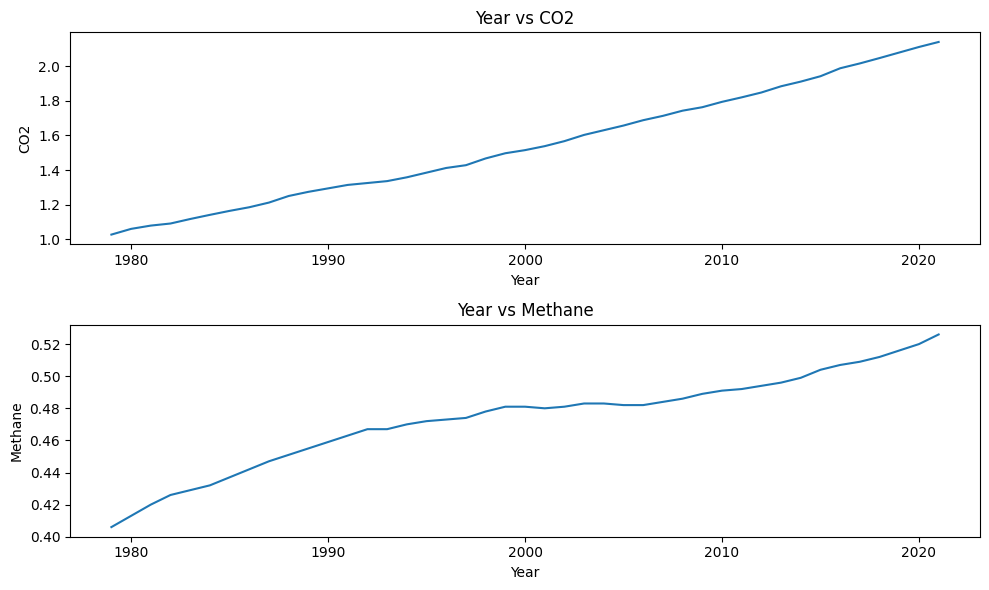

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 6))

# Year vs. CO2
plt.subplot(2, 1, 1)
plt.plot(data['Year'], data['CO2'])
plt.title('Year vs CO2')
plt.xlabel('Year')
plt.ylabel('CO2')

# Year vs. Methane
plt.subplot(2, 1, 2)
plt.plot(data['Year'], data['Methane'])
plt.title('Year vs Methane')
plt.xlabel('Year')
plt.ylabel('Methane')

plt.tight_layout()
plt.show()


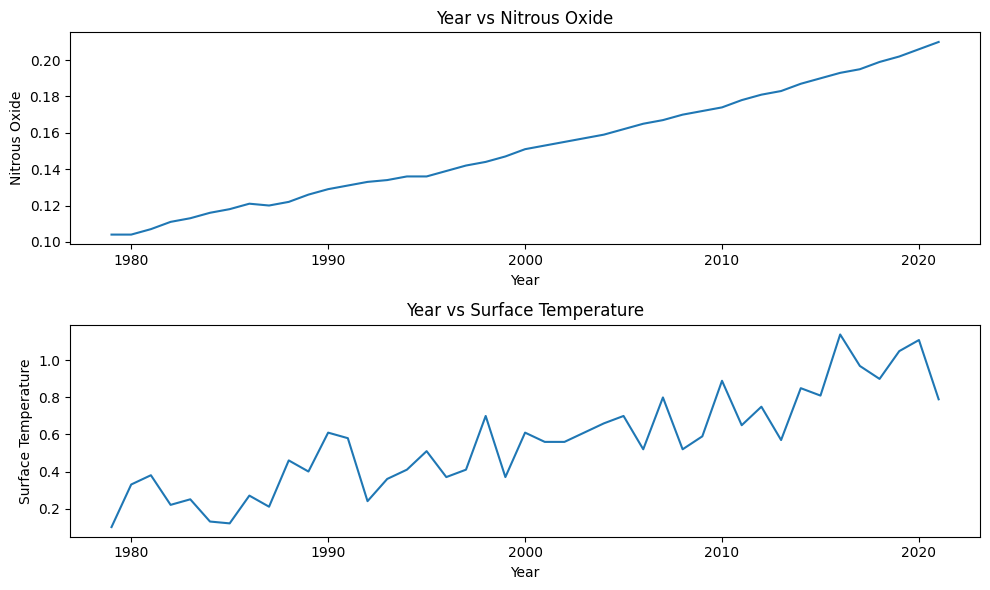

In [ ]:
plt.figure(figsize=(10, 6))

# Year vs. Nitrous Oxide
plt.subplot(2, 1, 1)
plt.plot(data['Year'], data['Nitrous_Oxide'])
plt.title('Year vs Nitrous Oxide')
plt.xlabel('Year')
plt.ylabel('Nitrous Oxide')

# Year vs. Surface Temperature
plt.subplot(2, 1, 2)
plt.plot(data['Year'], data['Surface_Temperature'])
plt.title('Year vs Surface Temperature')
plt.xlabel('Year')
plt.ylabel('Surface Temperature')

plt.tight_layout()
plt.show()


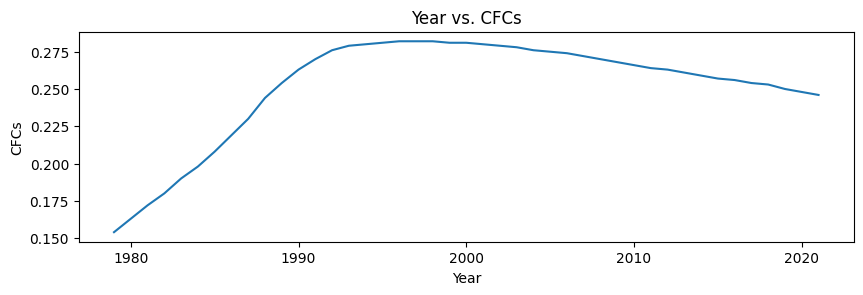

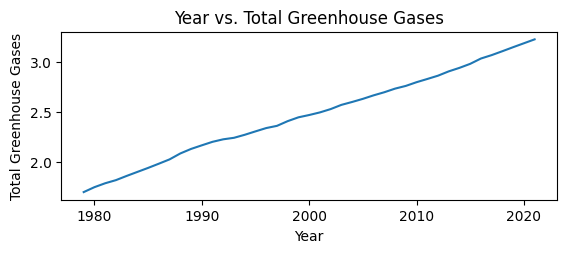

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(data['Year'], data['CFCs'])
plt.title('Year vs. CFCs')
plt.xlabel('Year')
plt.ylabel('CFCs')
plt.show()
plt.subplot(2, 1, 2)
plt.plot(data['Year'], data['Total_Greenhouse_Gases'])
plt.title('Year vs. Total Greenhouse Gases')
plt.xlabel('Year')
plt.ylabel('Total Greenhouse Gases')
plt.show()


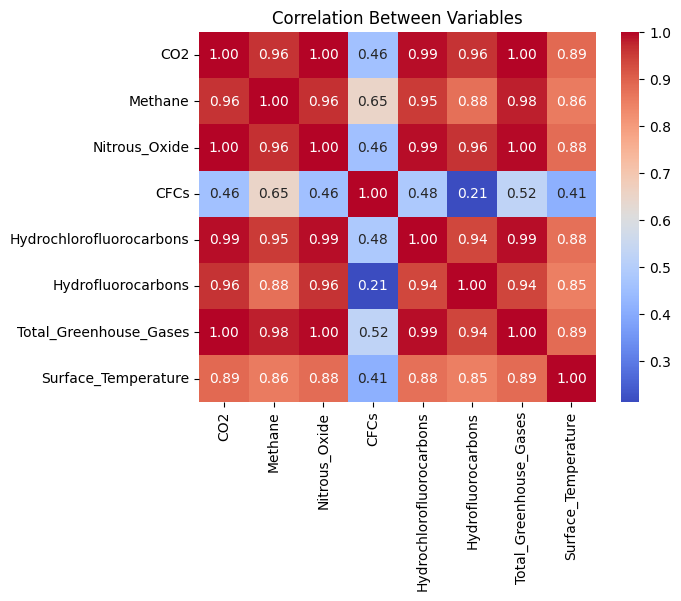

In [ ]:
import seaborn as sns

# Select the variables for correlation analysis
correlation_variables = ['CO2', 'Methane', 'Nitrous_Oxide', 'CFCs', 'Hydrochlorofluorocarbons', 'Hydrofluorocarbons', 'Total_Greenhouse_Gases', 'Surface_Temperature']

# Compute the correlation matrix
correlation_matrix = data[correlation_variables].corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Variables')
plt.show()


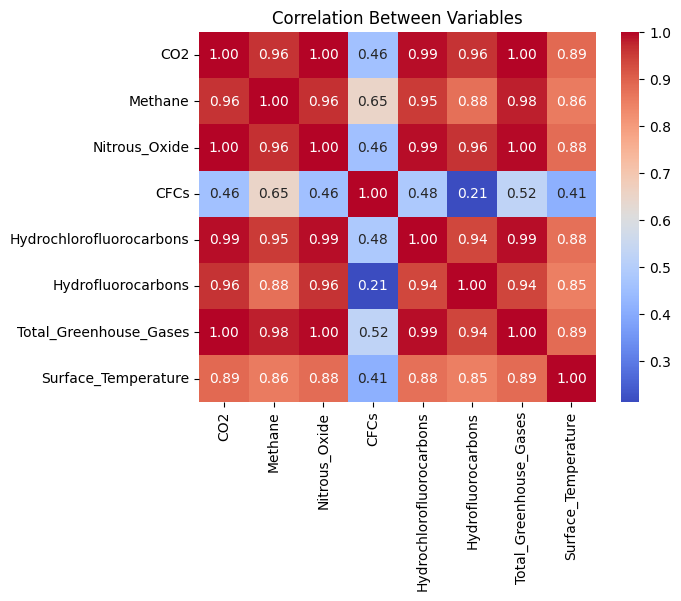

In [ ]:
import seaborn as sns

# Select the variables for correlation analysis
correlation_variables = ['CO2', 'Methane', 'Nitrous_Oxide', 'CFCs', 'Hydrochlorofluorocarbons', 'Hydrofluorocarbons', 'Total_Greenhouse_Gases', 'Surface_Temperature']

# Compute the correlation matrix
correlation_matrix = data[correlation_variables].corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Variables')
plt.show()


# Data Modeling

## data setting for Models

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanAbsoluteError

# Assuming you have your time series data stored in a pandas DataFrame named 'data' with columns: Year, CO2, Methane, Nitrous_Oxide, CFCs, ...

# Extract the variables for prediction
target_variables = ['CO2', 'Methane', 'Nitrous_Oxide', 'CFCs',
       'Hydrochlorofluorocarbons', 'Hydrofluorocarbons',
       'Total_Greenhouse_Gases', 'Total_Greenhouse_Gases_Scaled',
       '1990_Equals_1', 'Change', 'Surface_Temperature', 'CO2_Mean']

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[target_variables])

# Define the number of time steps (lags) to consider
time_steps = 1

# Prepare the training data
train_data = data_scaled[data['Year'] < 2012]
X_train = []
y_train = []
for i in range(time_steps, len(data_scaled)):
    X_train.append(data_scaled[i - time_steps:i])
    y_train.append(data_scaled[i])

X_train = np.array(X_train)
y_train = np.array(y_train)

# Prepare the test data
test_data = data_scaled[data['Year'] >= 2012]
X_test = []
y_test = []
for i in range(0, len(test_data)):
    val=i+len(train_data)
    X_test.append(data_scaled[val - time_steps:val])
    y_test.append(test_data[i])

X_test = np.array(X_test)
y_test = np.array(y_test)


In [ ]:
y_test.shape,y_train.shape

((12, 12), (44, 12))

### LSTM Model

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(target_variables), activation='linear'))  # Adjust the output dimension based on the number of target variables

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[MeanAbsoluteError()])

# Train the model
history=model.fit(X_train, y_train, epochs=500, batch_size=16)


Epoch 1/500
3/3 [==============================] - 3s 8ms/step - loss: 0.3535 - mean_absolute_error: 0.5161
Epoch 2/500
3/3 [==============================] - 0s 7ms/step - loss: 0.3334 - mean_absolute_error: 0.4987
Epoch 3/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3125 - mean_absolute_error: 0.4799
Epoch 4/500
3/3 [==============================] - 0s 9ms/step - loss: 0.2876 - mean_absolute_error: 0.4560
Epoch 5/500
3/3 [==============================] - 0s 11ms/step - loss: 0.2571 - mean_absolute_error: 0.4263
Epoch 6/500
3/3 [==============================] - 0s 8ms/step - loss: 0.2245 - mean_absolute_error: 0.3903
Epoch 7/500
3/3 [==============================] - 0s 8ms/step - loss: 0.1886 - mean_absolute_error: 0.3454
Epoch 8/500
3/3 [==============================] - 0s 8ms/step - loss: 0.1520 - mean_absolute_error: 0.2930
Epoch 9/500
3/3 [==============================] - 0s 7ms/step - loss: 0.1212 - mean_absolute_error: 0.2541
Epoch 10/500
3/3 [=========

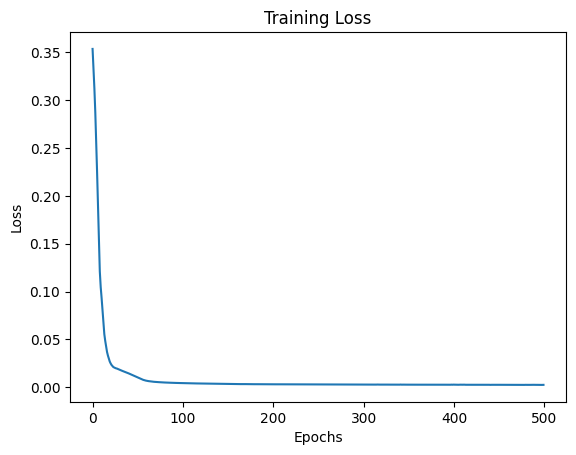

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### LSTM Predictions

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Inverse scale the predictions
y_pred = scaler.inverse_transform(y_pred)



1/1 [==============================] - 0s 495ms/step


In [ ]:
print(y_pred)

[[1.8606193e+00 4.9530733e-01 1.8166091e-01 2.6229349e-01 4.9754310e-02
  2.4152320e-02 2.8756330e+00 4.7747827e+02 1.3223058e+00 1.7106671e+00
  7.9147530e-01 3.9501672e+02]
 [1.8891224e+00 4.9789903e-01 1.8485692e-01 2.6112777e-01 5.0867032e-02
  2.5696112e-02 2.9112504e+00 4.8111798e+02 1.3405863e+00 1.7728198e+00
  8.1566077e-01 3.9723160e+02]
 [1.9174130e+00 5.0088048e-01 1.8629980e-01 2.5777265e-01 5.1688064e-02
  2.8294319e-02 2.9591014e+00 4.8216040e+02 1.3474560e+00 1.6561413e+00
  8.3699632e-01 3.9917645e+02]
 [1.9452457e+00 5.0317985e-01 1.9065973e-01 2.5787720e-01 5.2902032e-02
  2.9208919e-02 2.9846520e+00 4.8755701e+02 1.3736353e+00 1.8424433e+00
  8.6208051e-01 4.0155612e+02]
 [1.9776413e+00 5.0643164e-01 1.9328931e-01 2.5532886e-01 5.3827278e-02
  3.1839844e-02 3.0286343e+00 4.9027792e+02 1.3897319e+00 1.8107429e+00
  8.8508999e-01 4.0397485e+02]
 [2.0273359e+00 5.1042581e-01 1.9785269e-01 2.5306541e-01 5.6085754e-02
  3.3922333e-02 3.0973628e+00 4.9403848e+02 1.4134061

In [ ]:
# Convert the values to a more readable format
formatted_values = [f'{value:.2f}' for value in y_pred[3]]

# Print the formatted values
print(formatted_values)

['1.95', '0.50', '0.19', '0.26', '0.05', '0.03', '2.98', '487.56', '1.37', '1.84', '0.86', '401.56']


In [ ]:
# Inverse scale the predictions
yy = scaler.inverse_transform(y_test)
yy = [f'{value:.2f}' for value in yy[3]]
# Print the formatted values
print(yy)

['1.94', '0.50', '0.19', '0.26', '0.05', '0.03', '2.98', '485.00', '1.38', '1.80', '0.81', '401.01']


### Predict any Year Value

In [ ]:
# Preprocess the input for prediction
#input_year = int(input("Please enter a year: "))
input_year = 2021

prediction_val = []
if input_year>2021:
  # Prepare the input data
  input_data = data[data['Year'] <= 2021]
  input_data_scaled = scaler.transform(input_data[target_variables])
  # Prepare the input sequence
  input_sequences = []
  for i in range(len(input_data_scaled) - time_steps, len(input_data_scaled)):
      input_sequences.append(input_data_scaled[i - time_steps:i])

  for year in range(2022, input_year + 1):
      input_sequences_array = np.array([sequence for sequence in input_sequences if len(sequence) == time_steps])
      input_sequence_reshaped = np.reshape(input_sequences_array, (input_sequences_array.shape[0], input_sequences_array.shape[1], len(target_variables)))

      # Make predictions for the input sequence
      predictions = model.predict(input_sequence_reshaped[-1].reshape(1, time_steps, len(target_variables)))

      # Inverse transform the predicted values
      prediction = scaler.inverse_transform(predictions)

      # Get the predicted values for the current year
      predicted_values = prediction[0]
      
      # Append the predicted values to the results
      prediction_val.append(predicted_values)
      # for variable, value in zip(target_variables, prediction_val[-1]):
      #   print(f"{variable}: {value}")
      # Update the input sequence for the next iteration
      input_sequences[0][:-1] = input_sequences[0][1:]  # Remove the first value
      input_sequences[0][-1] = np.array(predictions)  # Add predictions at the last index

else:
      input_data = data[data['Year'] < input_year]
      input_data_scaled = scaler.transform(input_data[target_variables])
      print("h1")
      # Prepare the input sequence
      input_sequence = []
      for i in range(len(input_data_scaled) - time_steps, len(input_data_scaled)):
          input_sequence.append(input_data_scaled[i - time_steps:i])

      input_sequence = np.array(input_sequence)

      # Reshape the input sequence for LSTM (input_shape: [samples, time_steps, features])
      input_sequence = np.reshape(input_sequence, (input_sequence.shape[0], input_sequence.shape[1], len(target_variables)))

      # Make predictions for the input sequence
      predictions = model.predict(input_sequence)

      # Inverse transform the predicted values
      prediction_val = scaler.inverse_transform(predictions)

      # Get the predicted values for the year 2022
      predicted_values = prediction_val[-1]
print("Predictions for year: ",input_year)
for variable, value in zip(target_variables, prediction_val[-1]):
    print(f"{variable}: {value}")

h1
1/1 [==============================] - 0s 24ms/step
Predictions for year:  2021
CO2: 2.126894235610962
Methane: 0.5212212204933167
Nitrous_Oxide: 0.2083754539489746
CFCs: 0.2471071183681488
Hydrochlorofluorocarbons: 0.05832769349217415
Hydrofluorocarbons: 0.04293646663427353
Total_Greenhouse_Gases: 3.2072322368621826
Total_Greenhouse_Gases_Scaled: 506.9593200683594
1990_Equals_1: 1.486755132675171
Change: 1.9463515281677246
Surface_Temperature: 0.9879018068313599
CO2_Mean: 415.7043762207031


In [ ]:
import numpy as np

# Preprocess the input for prediction
input_year = int(input("Please enter a year: "))

def convert_watt_per_m2_to_joule_per_year(watt_per_m2):
    total_surface_area_earth_m2 = 5.1 * 10**14
    seconds_per_year = 60 * 60 * 24 * 365
    joules_per_year = watt_per_m2 * total_surface_area_earth_m2 * seconds_per_year
    return joules_per_year

def get_predictions(input_year):
    prediction_val = []
    if input_year > 2021:
        input_data = data[data['Year'] <= 2021]
        input_data_scaled = scaler.transform(input_data[target_variables])
        # Preparing input sequence and other parts of your code

        # Making predictions and inverse transforming the predicted values
        predictions = model.predict(input_sequence_reshaped[-1].reshape(1, time_steps, len(target_variables)))
        prediction = scaler.inverse_transform(predictions)
        predicted_values = prediction[0]

        prediction_val.append(predicted_values)
        # Updating input sequence for the next iteration and other parts of your code
    else:
        input_data = data[data['Year'] < input_year]
        input_data_scaled = scaler.transform(input_data[target_variables])
        # Preparing input sequence and other parts of your code

        # Making predictions and inverse transforming the predicted values
        predictions = model.predict(input_sequence)
        prediction_val = scaler.inverse_transform(predictions)
        predicted_values = prediction_val[-1]

    return predicted_values

# Variables to convert to joules
variables_to_convert = ["CO2", "Methane", "Nitrous_Oxide", "CFCs", "Hydrochlorofluorocarbons", "Hydrofluorocarbons", "Total_Greenhouse_Gases"]

# Get predictions
predictions = get_predictions(input_year)

# Handle unit conversions
for i, (variable, value) in enumerate(zip(target_variables, predictions)):
    if variable in variables_to_convert:
        predictions[i] = convert_watt_per_m2_to_joule_per_year(value)

print("Predictions for year: ", input_year)
for variable, value in zip(target_variables, predictions):
    if variable in variables_to_convert:
        print(f"{variable}: {value} joules per year")
    elif variable == "Total_Greenhouse_Gases_Scaled" or variable == "CO2_Mean":
        print(f"{variable}: {value} ppm")
    elif variable == "1990_Equals_1":
        print(f"{variable}: {value} AGGI")
    elif variable == "Change":
        print(f"{variable}: {value} % change per year")
    elif variable == "Surface_Temperature":
        print(f"{variable}: {value}")

Please enter a year: 2050
1/1 [==============================] - 0s 32ms/step
Predictions for year:  2050
CO2: 3.524745400881258e+22 joules per year
Methane: 8.502787089276242e+21 joules per year
Nitrous_Oxide: 3.44928922167953e+21 joules per year
CFCs: 3.9775853833431097e+21 joules per year
Hydrochlorofluorocarbons: 9.803440594672188e+20 joules per year
Hydrofluorocarbons: 7.58697855693808e+20 joules per year
Total_Greenhouse_Gases: 5.308907191859049e+22 joules per year
Total_Greenhouse_Gases_Scaled: 513.9339599609375 ppm
1990_Equals_1: 1.5274412631988525 AGGI
Change: 1.9509809017181396 % change per year
Surface_Temperature: 1.0384137630462646
CO2_Mean: 420.72265625 ppm


In [ ]:
prediction_val

array([[2.1268942e+00, 5.2122122e-01, 2.0837545e-01, 2.4710712e-01,
        5.8327693e-02, 4.2936467e-02, 3.2072322e+00, 5.0695932e+02,
        1.4867551e+00, 1.9463515e+00, 9.8790181e-01, 4.1570438e+02]],
      dtype=float32)

### Actual and predicted values Graph

In [ ]:
# Prepare the data for prediction
X_all = []
y_all=[]
for i in range(time_steps, len(data_scaled)):
    X_all.append(data_scaled[i - time_steps:i])
    y_all.append(data_scaled[i])

X_all = np.array(X_all)
y_all = np.array(y_all)
# Make predictions on all data
y_pred_all = model.predict(X_all)

# Denormalize the predicted values
y_pred_all_denormalized = scaler.inverse_transform(y_pred_all)
y_all_denormalized = scaler.inverse_transform(y_all)



2/2 [==============================] - 0s 6ms/step


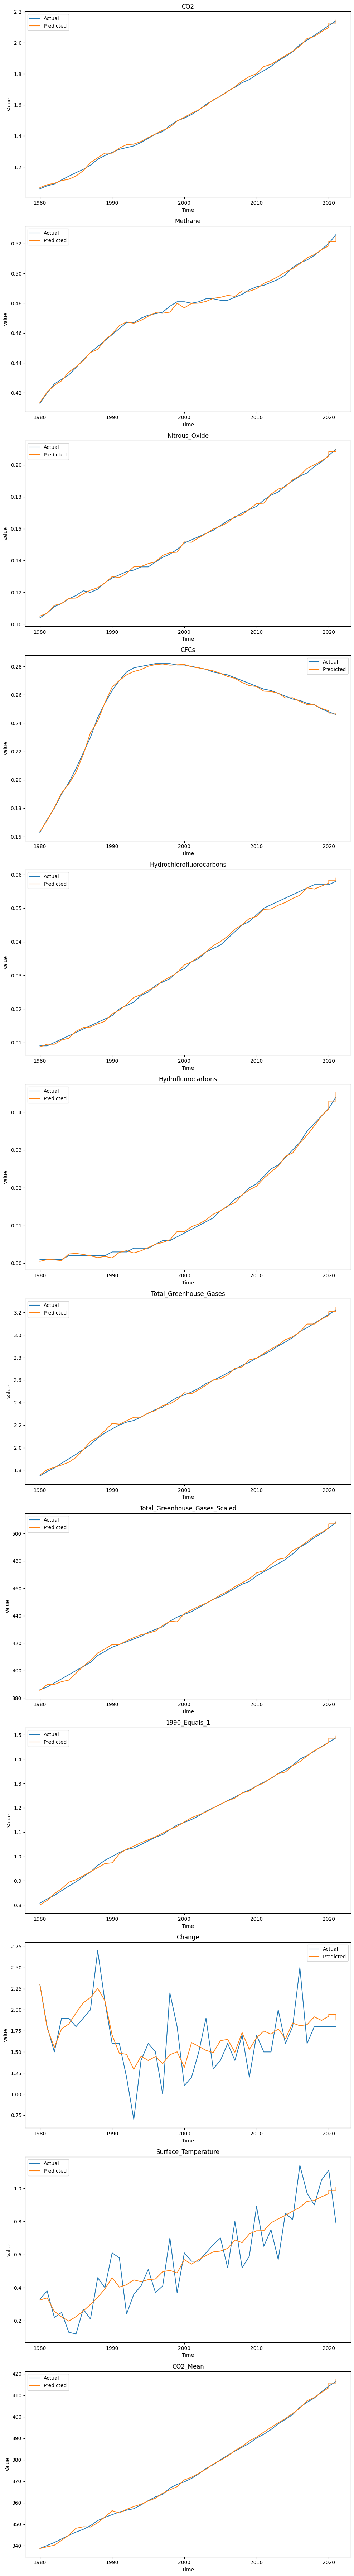

In [ ]:
# Plot actual vs predicted for each target variable
fig, axes = plt.subplots(len(target_variables), 1, figsize=(10, 6 * len(target_variables)))

for i, target_variable in enumerate(target_variables):
    axes[i].plot(data['Year'][time_steps:], data[target_variable][time_steps:], label='Actual')
    axes[i].plot(data['Year'][time_steps:], y_pred_all_denormalized[:, i], label='Predicted')
    axes[i].set_title(target_variable)
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Value')
    axes[i].legend()

plt.tight_layout()
plt.show()


In [ ]:
X_train.shape

(44, 1, 12)

## ANN Model

In [ ]:
from tensorflow.keras.layers import Flatten

# Build the ANN model
ANN_Model = Sequential()
ANN_Model.add(Flatten(input_shape=(X_train.shape[1], X_train.shape[2])))
ANN_Model.add(Dense(256, activation='relu'))
ANN_Model.add(Dense(128, activation='relu'))
ANN_Model.add(Dense(64, activation='relu'))
ANN_Model.add(Dense(32, activation='relu'))
ANN_Model.add(Dense(16, activation='relu'))
ANN_Model.add(Dense(X_train.shape[2], activation='linear'))  # Adjust the output dimension based on the number of features

# Compile the model
ANN_Model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[MeanAbsoluteError()])

# Train the model
history = ANN_Model.fit(X_train, y_train, epochs=300, batch_size=16)


Epoch 1/300
3/3 [==============================] - 3s 9ms/step - loss: 0.3333 - mean_absolute_error: 0.4993
Epoch 2/300
3/3 [==============================] - 0s 8ms/step - loss: 0.2870 - mean_absolute_error: 0.4555
Epoch 3/300
3/3 [==============================] - 0s 8ms/step - loss: 0.2312 - mean_absolute_error: 0.3970
Epoch 4/300
3/3 [==============================] - 0s 8ms/step - loss: 0.1859 - mean_absolute_error: 0.3360
Epoch 5/300
3/3 [==============================] - 0s 9ms/step - loss: 0.1572 - mean_absolute_error: 0.3004
Epoch 6/300
3/3 [==============================] - 0s 8ms/step - loss: 0.1346 - mean_absolute_error: 0.2891
Epoch 7/300
3/3 [==============================] - 0s 8ms/step - loss: 0.1114 - mean_absolute_error: 0.2651
Epoch 8/300
3/3 [==============================] - 0s 8ms/step - loss: 0.0941 - mean_absolute_error: 0.2346
Epoch 9/300
3/3 [==============================] - 0s 8ms/step - loss: 0.0839 - mean_absolute_error: 0.2101
Epoch 10/300
3/3 [==========

In [ ]:
ANN_Model.save("my_h5_model.h5")

### ANN Predictions

In [ ]:
# Make predictions on the test data
y_pred = ANN_Model.predict(X_test)

# Denormalize the predicted and actual values
y_pred = scaler.inverse_transform(y_pred)


1/1 [==============================] - 0s 96ms/step


In [ ]:
# Convert the values to a more readable format
formatted_values = [f'{value:.2f}' for value in y_pred[1]]

# Print the formatted values
print(formatted_values)

['1.85', '0.50', '0.18', '0.26', '0.05', '0.03', '2.87', '479.63', '1.34', '1.73', '0.78', '397.99']


In [ ]:
# # Inverse scale the predictions
yy = scaler.inverse_transform(y_test)
yy = [f'{value:.2f}' for value in yy[1]]
# Print the formatted values
print(yy)

['1.88', '0.50', '0.18', '0.26', '0.05', '0.03', '2.90', '478.00', '1.34', '2.00', '0.57', '396.74']


In [ ]:
# Preprocess the input for prediction
#input_year = int(input("Please enter a year: "))
input_year = 2021

prediction_val = []
if input_year>2021:
  # Prepare the input data
  input_data = data[data['Year'] <= 2021]
  input_data_scaled = scaler.transform(input_data[target_variables])
  # Prepare the input sequence
  input_sequences = []
  for i in range(len(input_data_scaled) - time_steps, len(input_data_scaled)):
      input_sequences.append(input_data_scaled[i - time_steps:i])

  for year in range(2022, input_year + 1):
      input_sequences_array = np.array([sequence for sequence in input_sequences if len(sequence) == time_steps])
      input_sequence_reshaped = np.reshape(input_sequences_array, (input_sequences_array.shape[0], input_sequences_array.shape[1], len(target_variables)))

      # Make predictions for the input sequence
      predictions = ANN_Model.predict(input_sequence_reshaped[-1].reshape(1, time_steps, len(target_variables)))

      # Inverse transform the predicted values
      prediction = scaler.inverse_transform(predictions)

      # Get the predicted values for the current year
      predicted_values = prediction[0]
      
      # Append the predicted values to the results
      prediction_val.append(predicted_values)
      # for variable, value in zip(target_variables, prediction_val[-1]):
      #   print(f"{variable}: {value}")
      # Update the input sequence for the next iteration
      input_sequences[0][:-1] = input_sequences[0][1:]  # Remove the first value
      input_sequences[0][-1] = np.array(predictions)  # Add predictions at the last index

else:
      input_data = data[data['Year'] < input_year]
      input_data_scaled = scaler.transform(input_data[target_variables])
      print("h1")
      # Prepare the input sequence
      input_sequence = []
      for i in range(len(input_data_scaled) - time_steps, len(input_data_scaled)):
          input_sequence.append(input_data_scaled[i - time_steps:i])

      input_sequence = np.array(input_sequence)

      # Reshape the input sequence for LSTM (input_shape: [samples, time_steps, features])
      input_sequence = np.reshape(input_sequence, (input_sequence.shape[0], input_sequence.shape[1], len(target_variables)))

      # Make predictions for the input sequence
      predictions = model.predict(input_sequence)

      # Inverse transform the predicted values
      prediction_val = scaler.inverse_transform(predictions)

      # Get the predicted values for the year 2022
      predicted_values = prediction_val[-1]
print("Predictions for year: ",input_year)
for variable, value in zip(target_variables, prediction_val[-1]):
    print(f"{variable}: {value}")

h1
1/1 [==============================] - 0s 25ms/step
Predictions for year:  2021
CO2: 2.126894235610962
Methane: 0.5212212204933167
Nitrous_Oxide: 0.2083754539489746
CFCs: 0.2471071183681488
Hydrochlorofluorocarbons: 0.05832769349217415
Hydrofluorocarbons: 0.04293646663427353
Total_Greenhouse_Gases: 3.2072322368621826
Total_Greenhouse_Gases_Scaled: 506.9593200683594
1990_Equals_1: 1.486755132675171
Change: 1.9463515281677246
Surface_Temperature: 0.9879018068313599
CO2_Mean: 415.7043762207031


In [ ]:
# Preprocess the input for prediction
input_year = int(input("Please enter a year: "))

def convert_watt_per_m2_to_joule_per_year(watt_per_m2):
    total_surface_area_earth_m2 = 5.1 * 10**14  # Total surface area of the Earth in m²
    seconds_per_year = 60 * 60 * 24 * 365  # Number of seconds in a year

    joules_per_year = watt_per_m2 * total_surface_area_earth_m2 * seconds_per_year
    return joules_per_year

def get_predictions(input_year):
    prediction_val = []
    if input_year > 2021:
        input_data = data[data['Year'] <= 2021]
        input_data_scaled = scaler.transform(input_data[target_variables])

        input_sequences = []
        for i in range(len(input_data_scaled) - time_steps, len(input_data_scaled)):
            input_sequences.append(input_data_scaled[i - time_steps:i])

        for year in range(2022, input_year + 1):
            input_sequences_array = np.array([sequence for sequence in input_sequences if len(sequence) == time_steps])
            input_sequence_reshaped = np.reshape(input_sequences_array, (input_sequences_array.shape[0], input_sequences_array.shape[1], len(target_variables)))

            predictions = ANN_Model.predict(input_sequence_reshaped[-1].reshape(1, time_steps, len(target_variables)))
            prediction = scaler.inverse_transform(predictions)
            predicted_values = prediction[0]

            prediction_val.append(predicted_values)
            input_sequences[0][:-1] = input_sequences[0][1:]  # Remove the first value
            input_sequences[0][-1] = np.array(predictions)  # Add predictions at the last index
    else:
        input_data = data[data['Year'] < input_year]
        input_data_scaled = scaler.transform(input_data[target_variables])

        input_sequence = []
        for i in range(len(input_data_scaled) - time_steps, len(input_data_scaled)):
            input_sequence.append(input_data_scaled[i - time_steps:i])

        input_sequence = np.array(input_sequence)
        input_sequence = np.reshape(input_sequence, (input_sequence.shape[0], input_sequence.shape[1], len(target_variables)))

        predictions = model.predict(input_sequence)
        prediction_val = scaler.inverse_transform(predictions)
        predicted_values = prediction_val[-1]

    return predicted_values

# Variables to convert to joules
variables_to_convert = ["CO2", "Methane", "Nitrous_Oxide", "CFCs", "Hydrochlorofluorocarbons", "Hydrofluorocarbons", "Total_Greenhouse_Gases"]

# Get predictions
predictions = get_predictions(input_year)

# Handle unit conversions
for i, (variable, value) in enumerate(zip(target_variables, predictions)):
    if variable in variables_to_convert:
        predictions[i] = convert_watt_per_m2_to_joule_per_year(value)

print("Predictions for year: ", input_year)
for variable, value in zip(target_variables, predictions):
    if variable in variables_to_convert:
        print(f"{variable}: {value} joules per year")
    elif variable == "Total_Greenhouse_Gases_Scaled" or variable == "CO2_Mean":
        print(f"{variable}: {value} ppm")
    elif variable == "1990_Equals_1":
        print(f"{variable}: {value} AGGI")
    elif variable == "Change":
        print(f"{variable}: {value} % change per year")
    elif variable == "Surface_Temperature":
        print(f"{variable}: {value}")

Please enter a year: 2050
1/1 [==============================] - 0s 28ms/step
Predictions for year:  2050
CO2: 3.4766307439022824e+22 joules per year
Methane: 8.366472135754992e+21 joules per year
Nitrous_Oxide: 3.3581673274689894e+21 joules per year
CFCs: 3.959089099673499e+21 joules per year
Hydrochlorofluorocarbons: 9.681817368297839e+20 joules per year
Hydrofluorocarbons: 6.946358398443229e+20 joules per year
Total_Greenhouse_Gases: 5.19183386774574e+22 joules per year
Total_Greenhouse_Gases_Scaled: 505.0675354003906 ppm
1990_Equals_1: 1.4687507152557373 AGGI
Change: 1.9183937311172485 % change per year
Surface_Temperature: 0.9651511311531067
CO2_Mean: 417.3520202636719 ppm


#Least Squares Regression

In [ ]:
import pandas as pd

# Read CO2 Emissions data
co2Data2 = pd.read_csv('/content/CO2Data.csv')
co2List = co2Data2.values.tolist()

# Read Greenhouse Gases data
ggData2 = pd.read_csv('/content/GreenhouseGasses.csv')
ggList = ggData2.values.tolist()

# Read Surface Temperature Change data
tempData2 = pd.read_csv('/content/TempData.csv')
tempList = tempData2.values.tolist()

In [ ]:
import numpy as np
import math
from pickle import dump, load
def convert_watt_per_m2_to_joule_per_year(watt_per_m2):
    # Constants
    total_surface_area_earth_m2 = 5.1 * 10**14  # Total surface area of the Earth in m²
    seconds_per_year = 60 * 60 * 24 * 365  # Number of seconds in a year

    # Conversion
    joules_per_year = watt_per_m2 * total_surface_area_earth_m2 * seconds_per_year

    return joules_per_year

def slope(x_coordinates, y_coordinates):
    x_coordinates_sum = np.sum(x_coordinates)
    y_coordinates_sum = np.sum(y_coordinates)
    xy_coordinates_sum = np.sum(x_coordinates*y_coordinates)
    x_squared_coordinates_sum = np.sum(x_coordinates*x_coordinates)
    
    slope = (xy_coordinates_sum*len(x_coordinates) - x_coordinates_sum*y_coordinates_sum) / (x_squared_coordinates_sum*len(x_coordinates) - x_coordinates_sum*x_coordinates_sum)
    y_intercept = (y_coordinates_sum - slope*x_coordinates_sum) / len(x_coordinates)
    return slope, y_intercept

def polynomial_regression(x_coordinates, y_coordinates, degree=2):
    # Fit a polynomial of the specified degree to the data
    coefficients = np.polyfit(x_coordinates, y_coordinates, degree)

    # Save coefficients
    dump(coefficients, open('coefficients.pkl', 'wb'))

    # Load coefficients
    loaded_coefficients = load(open('coefficients.pkl', 'rb'))

    # Use loaded coefficients to make predictions
    prediction = loaded_coefficients[0]*float(year)*float(year) + loaded_coefficients[1]*float(year) + loaded_coefficients[2]

    # Return the polynomial function
    return coefficients

print(df_list[len(df_list)-1])
year = input("What year would you like to find data about?: ")
print("In the year "+year+" our model predicts that:")
units = ["years","joules per year","joules per year","joules per year","joules per year","joules per year","joules per year","joules per year","ppm","AGGI","% change per year","","ppm"]

yValues = []
for index in range(1, len(df_list)):
    yValues.append(df_list[index][0])
yValues = np.array(yValues)  # Convert yValues to a numpy array
for index1 in range(1, len(df_list[0])):
    xValues = []
    for index2 in range(1, len(df_list)):
        xValues.append(df_list[index2][index1])
    xValues = np.array(xValues)  # Convert xValues to a numpy array
    line = polynomial_regression(yValues, xValues)
    prediction=line[0]*float(year)*float(year)+line[1]*float(year)+line[2]
    if(units[index1]=="joules per year"):
      prediction = convert_watt_per_m2_to_joule_per_year(prediction)
    print(str(df_list[0][index1])+" = "+str(round(prediction,3-int(math.floor(math.log10(abs(prediction))))))+" "+units[index1])
    

[2021.0, 2.14, 0.526, 0.21, 0.246, 0.058, 0.044, 3.222, 508.0, 1.488, 1.8, 0.79, 416.45]
What year would you like to find data about?: 2050
In the year 2050 our model predicts that:
CO2 = 5.197e+22 joules per year
Methane = 8.533e+21 joules per year
Nitrous_Oxide = 5.035e+21 joules per year
CFCs = -1.831e+21 joules per year
Hydrochlorofluorocarbons = 1.609e+21 joules per year
Hydrofluorocarbons = 2.243e+21 joules per year
Total_Greenhouse_Gases = 6.75e+22 joules per year
Total_Greenhouse_Gases_Scaled = 610.2 ppm
1990_Equals_1 = 1.939 AGGI
Change = 4.074 % change per year
Surface_Temperature = 1.805 
CO2_Mean = 503.5 ppm


In [ ]:
import numpy as np
import math
import os
from pickle import dump, load

def convert_watt_per_m2_to_joule_per_year(watt_per_m2):
    # Constants
    total_surface_area_earth_m2 = 5.1 * 10**14  # Total surface area of the Earth in m²
    seconds_per_year = 60 * 60 * 24 * 365  # Number of seconds in a year

    # Conversion
    joules_per_year = watt_per_m2 * total_surface_area_earth_m2 * seconds_per_year

    return joules_per_year

def calculate_slope(x_coordinates, y_coordinates, variable_name):
    x_coordinates_sum = np.sum(x_coordinates)
    y_coordinates_sum = np.sum(y_coordinates)
    xy_coordinates_sum = np.sum(x_coordinates*y_coordinates)
    x_squared_coordinates_sum = np.sum(x_coordinates*x_coordinates)
    
    slope = (xy_coordinates_sum*len(x_coordinates) - x_coordinates_sum*y_coordinates_sum) / (x_squared_coordinates_sum*len(x_coordinates) - x_coordinates_sum*x_coordinates_sum)
    y_intercept = (y_coordinates_sum - slope*x_coordinates_sum) / len(x_coordinates)

    # Save slope and y_intercept
    dump((slope, y_intercept), open(f'{variable_name}_slope_intercept.pkl', 'wb'))

    # Return the slope and y_intercept
    return slope, y_intercept

def polynomial_regression(x_coordinates, y_coordinates, variable_name, degree=2):
    # Fit a polynomial of the specified degree to the data
    coefficients = np.polyfit(x_coordinates, y_coordinates, degree)

    # Save coefficients
    dump(coefficients, open(f'{variable_name}_coefficients.pkl', 'wb'))

    # Return the coefficients
    return coefficients

units = ["years","joules per year","joules per year","joules per year","joules per year","joules per year","joules per year","joules per year","ppm","AGGI","% change per year","","ppm"]

yValues = []
for index in range(1, len(df_list)):
    yValues.append(df_list[index][0])
yValues = np.array(yValues)  # Convert yValues to a numpy array

coefficients_dict = {}
slope_intercept_dict = {}
for index1 in range(1, len(df_list[0])):
    xValues = []
    for index2 in range(1, len(df_list)):
        xValues.append(df_list[index2][index1])
    xValues = np.array(xValues)  # Convert xValues to a numpy array

    # Polynomial Regression
    coefficients = polynomial_regression(yValues, xValues, df_list[0][index1])
    coefficients_dict[df_list[0][index1]] = coefficients

    # Linear Regression
    slope, y_intercept = calculate_slope(yValues, xValues, df_list[0][index1])
    slope_intercept_dict[df_list[0][index1]] = (slope, y_intercept)